# Covid Fatality Prediction

---
I. Problem definition

1. Import Packages and Data
2. Userdefined Funktions
3. First Look at the Data
4. EDA (Exploratory Data Analysis)
5. Train-Test Split
6. Feature Engineering and Selection with Pipeline
7. Quick Assessment of multiple models
8. Class Weights/Over Sampling
9. Hyperparameter Search
10. Final Model Evaluation


---

## I. Problem definition
The goal is to predict wheater patients that have been infected with the SARS-CoV-2 Virus will die or survive the illness.
There are 20 Features and the label is the classification between "DIED" and "SURVIVED".


## 1. Import Packages and Data

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

## 2. Userdefined Funktions

In [105]:
from sklearn.metrics import roc_auc_score

def first_look(col):
    
    print("column name    : ", col)
    print("--------------------------------")

    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))

    print("num_of_nulls   : ", df[col].isnull().sum())

    print("num_of_uniques : ", df[col].nunique())

    print(df[col].value_counts(dropna = False))


def evaluation(model,x_test,y_test):
    

    print("Test AUC:",roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))

    print('Train AUC:',roc_auc_score(ytrain, model.predict_proba(xtrain)[:,1]))

## 3. First Look at the Data

In [106]:
# Load the data
df = pd.read_csv("Covid Data.csv")

In [107]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [109]:
df.describe().T.style.background_gradient(cmap="RdPu")

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.000000,1.632194,0.482208,1.000000,1.000000,2.000000,2.000000,2.000000
MEDICAL_UNIT,1048575.000000,8.980565,3.723278,1.000000,4.000000,12.000000,12.000000,13.000000
SEX,1048575.000000,1.499259,0.500000,1.000000,1.000000,1.000000,2.000000,2.000000
PATIENT_TYPE,1048575.000000,1.190765,0.392904,1.000000,1.000000,1.000000,1.000000,2.000000
INTUBED,1048575.000000,79.522875,36.868886,1.000000,97.000000,97.000000,97.000000,99.000000
PNEUMONIA,1048575.000000,3.346831,11.912881,1.000000,2.000000,2.000000,2.000000,99.000000
AGE,1048575.000000,41.794102,16.907389,0.000000,30.000000,40.000000,53.000000,121.000000
PREGNANT,1048575.000000,49.765585,47.510733,1.000000,2.000000,97.000000,97.000000,98.000000
DIABETES,1048575.000000,2.186404,5.424242,1.000000,2.000000,2.000000,2.000000,98.000000
COPD,1048575.000000,2.260569,5.132258,1.000000,2.000000,2.000000,2.000000,98.000000


In [110]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [111]:
df.describe(include=object).T

,count,unique,top,freq
DATE_DIED,1048575,401,9999-99-99,971633


In [112]:
# Create the label based on the DATE_DIED volumn
df["DEATH"] = [0 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

## 4. EDA (Exploratory Data Analysis)

column name    :  DEATH
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
DEATH
0    971633
1     76942
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x2756d627e90>,
 [Text(-1.0709017965481111, 0.2513351192134281, ''),
  Text(1.070901802431034, -0.2513350941471624, '')],
 [Text(-0.584128252662606, 0.1370918832073244, '92.7%'),
  Text(0.584128255871473, -0.13709186953481584, '7.3%')])

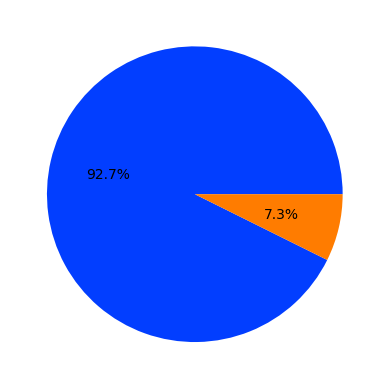

In [113]:
first_look('DEATH')
Death_state = list(df['DEATH'].value_counts())
colors = sns.color_palette('bright')[0:5]
plt.pie(x = Death_state, colors = colors, autopct='%.1f%%')

Its an highly unbalanced Dataset.
Oversampling techniques or class weights could be beneficial.

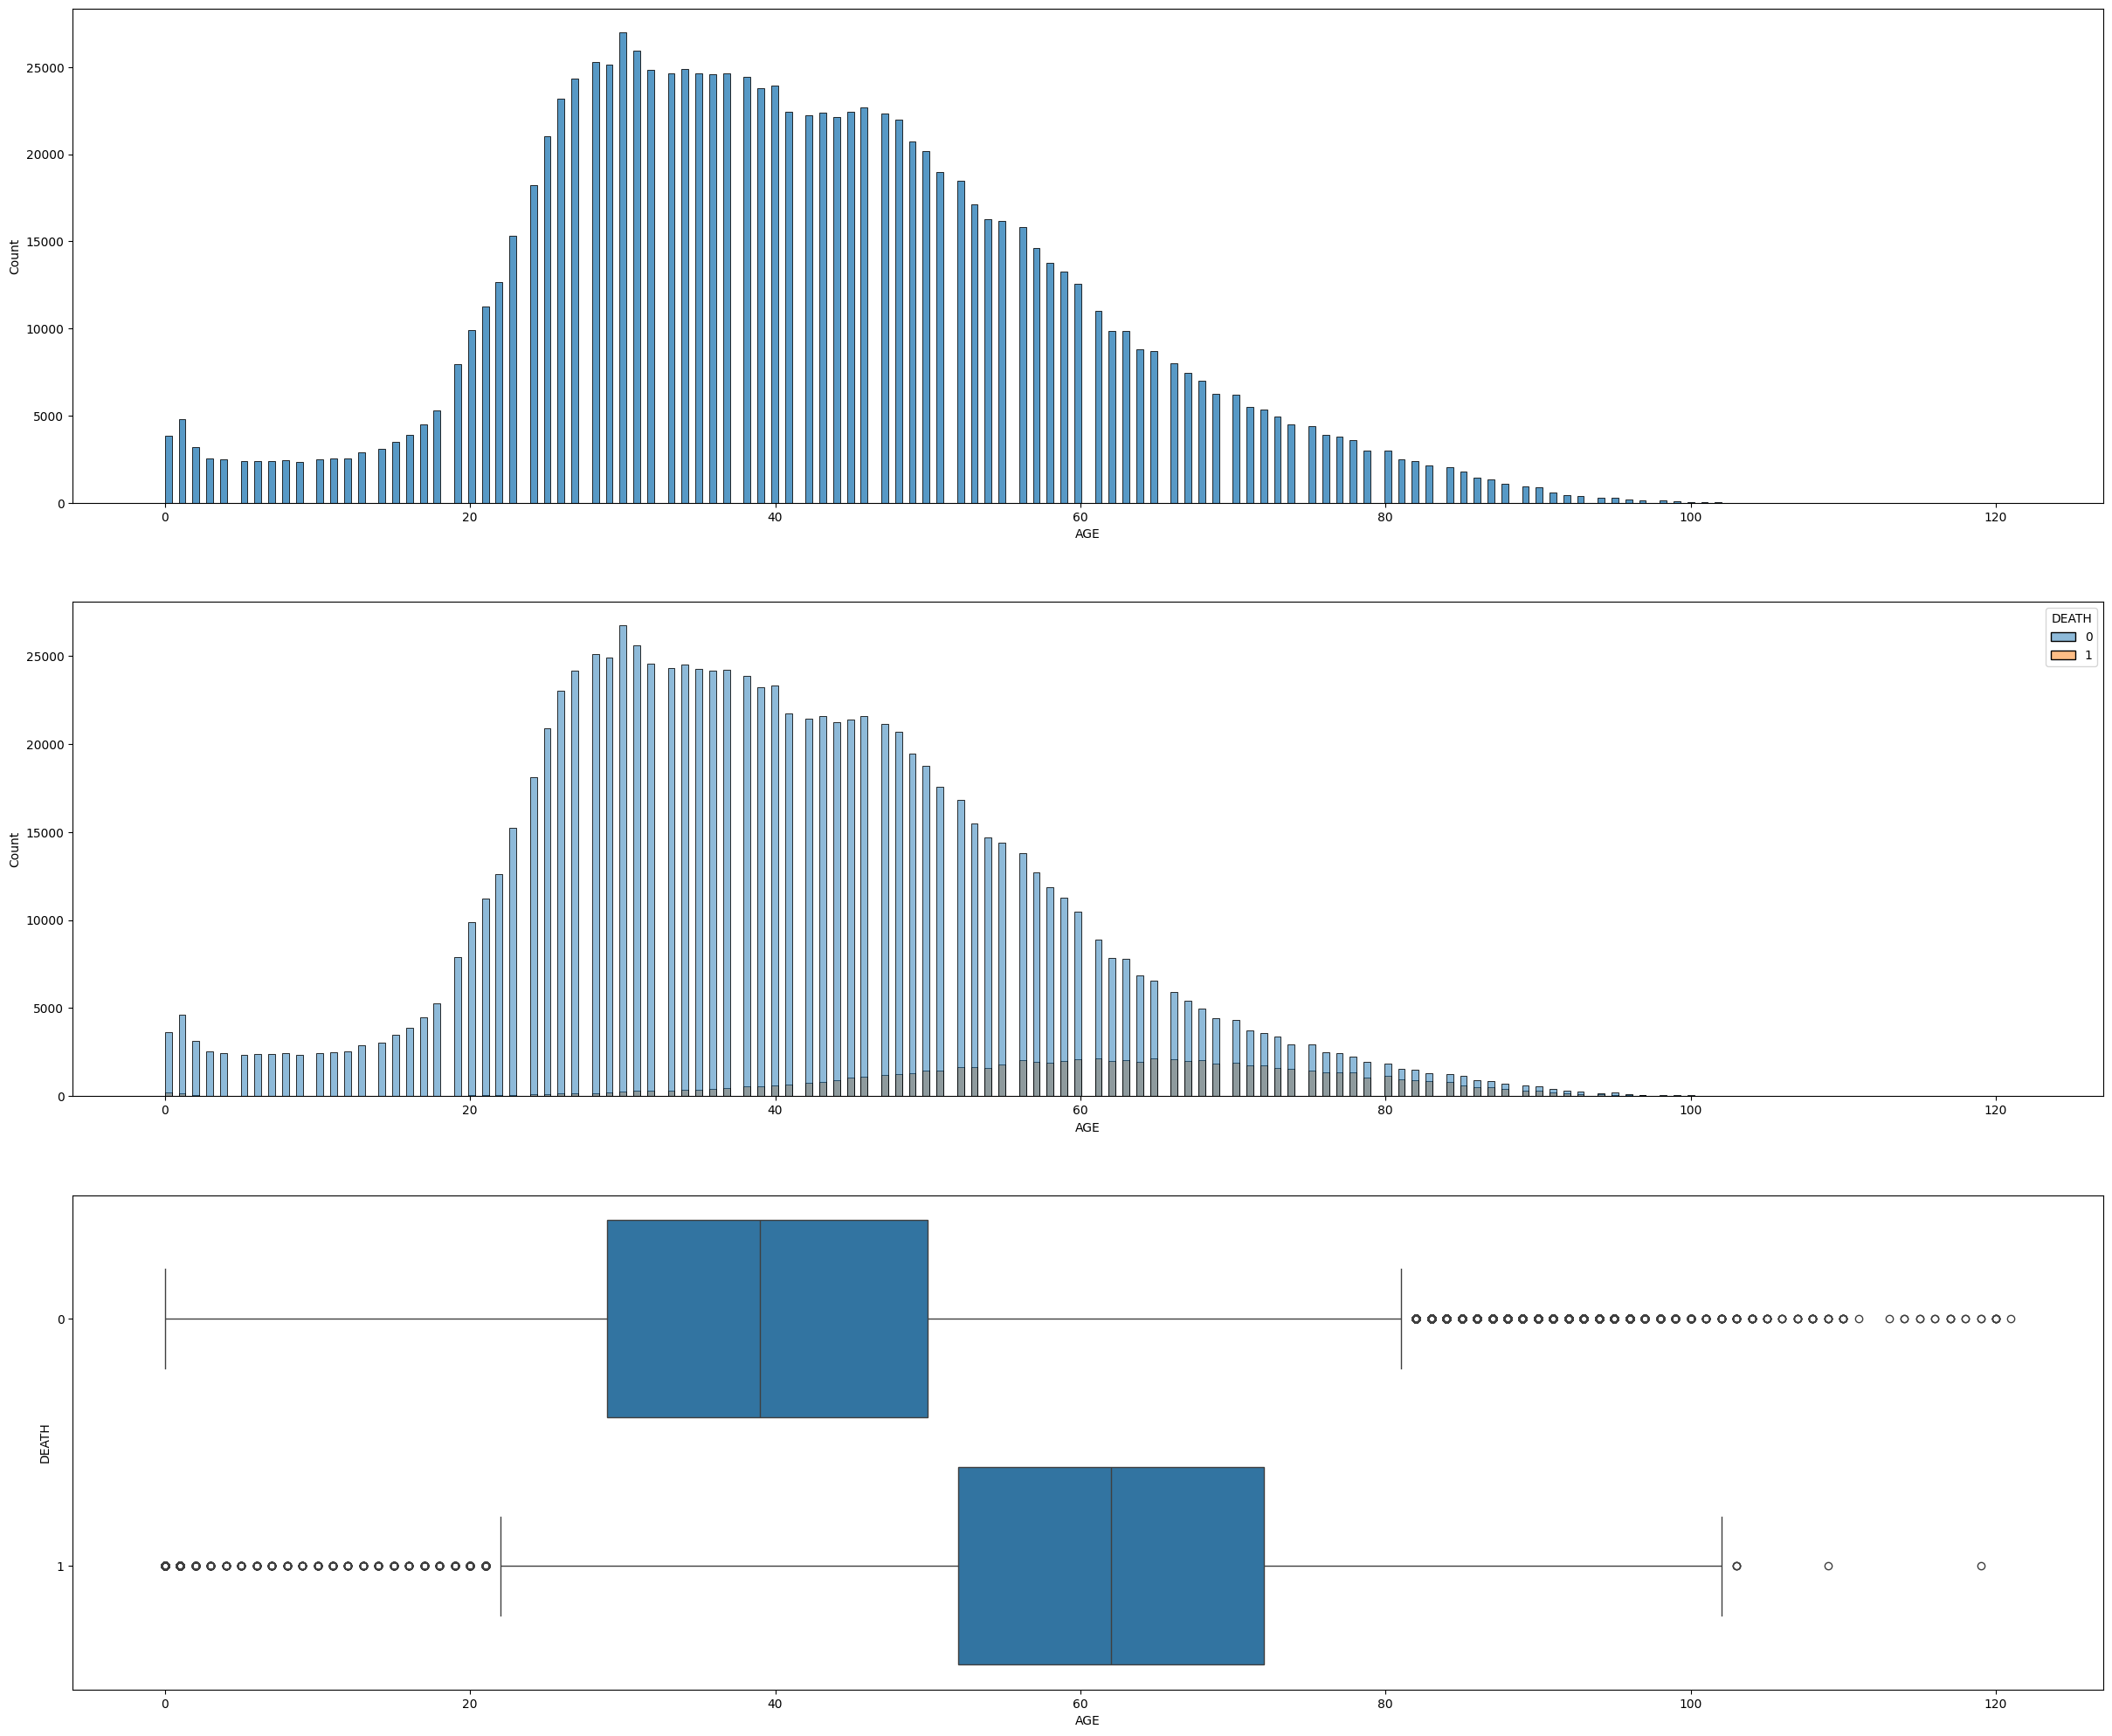

In [114]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df, x="AGE", ax=ax[0])
t = sns.histplot(data=df, x="AGE", ax=ax[1], hue="DEATH")
t = sns.boxplot(x="AGE", y="DEATH", orient="h", data=df, ax=ax[2])

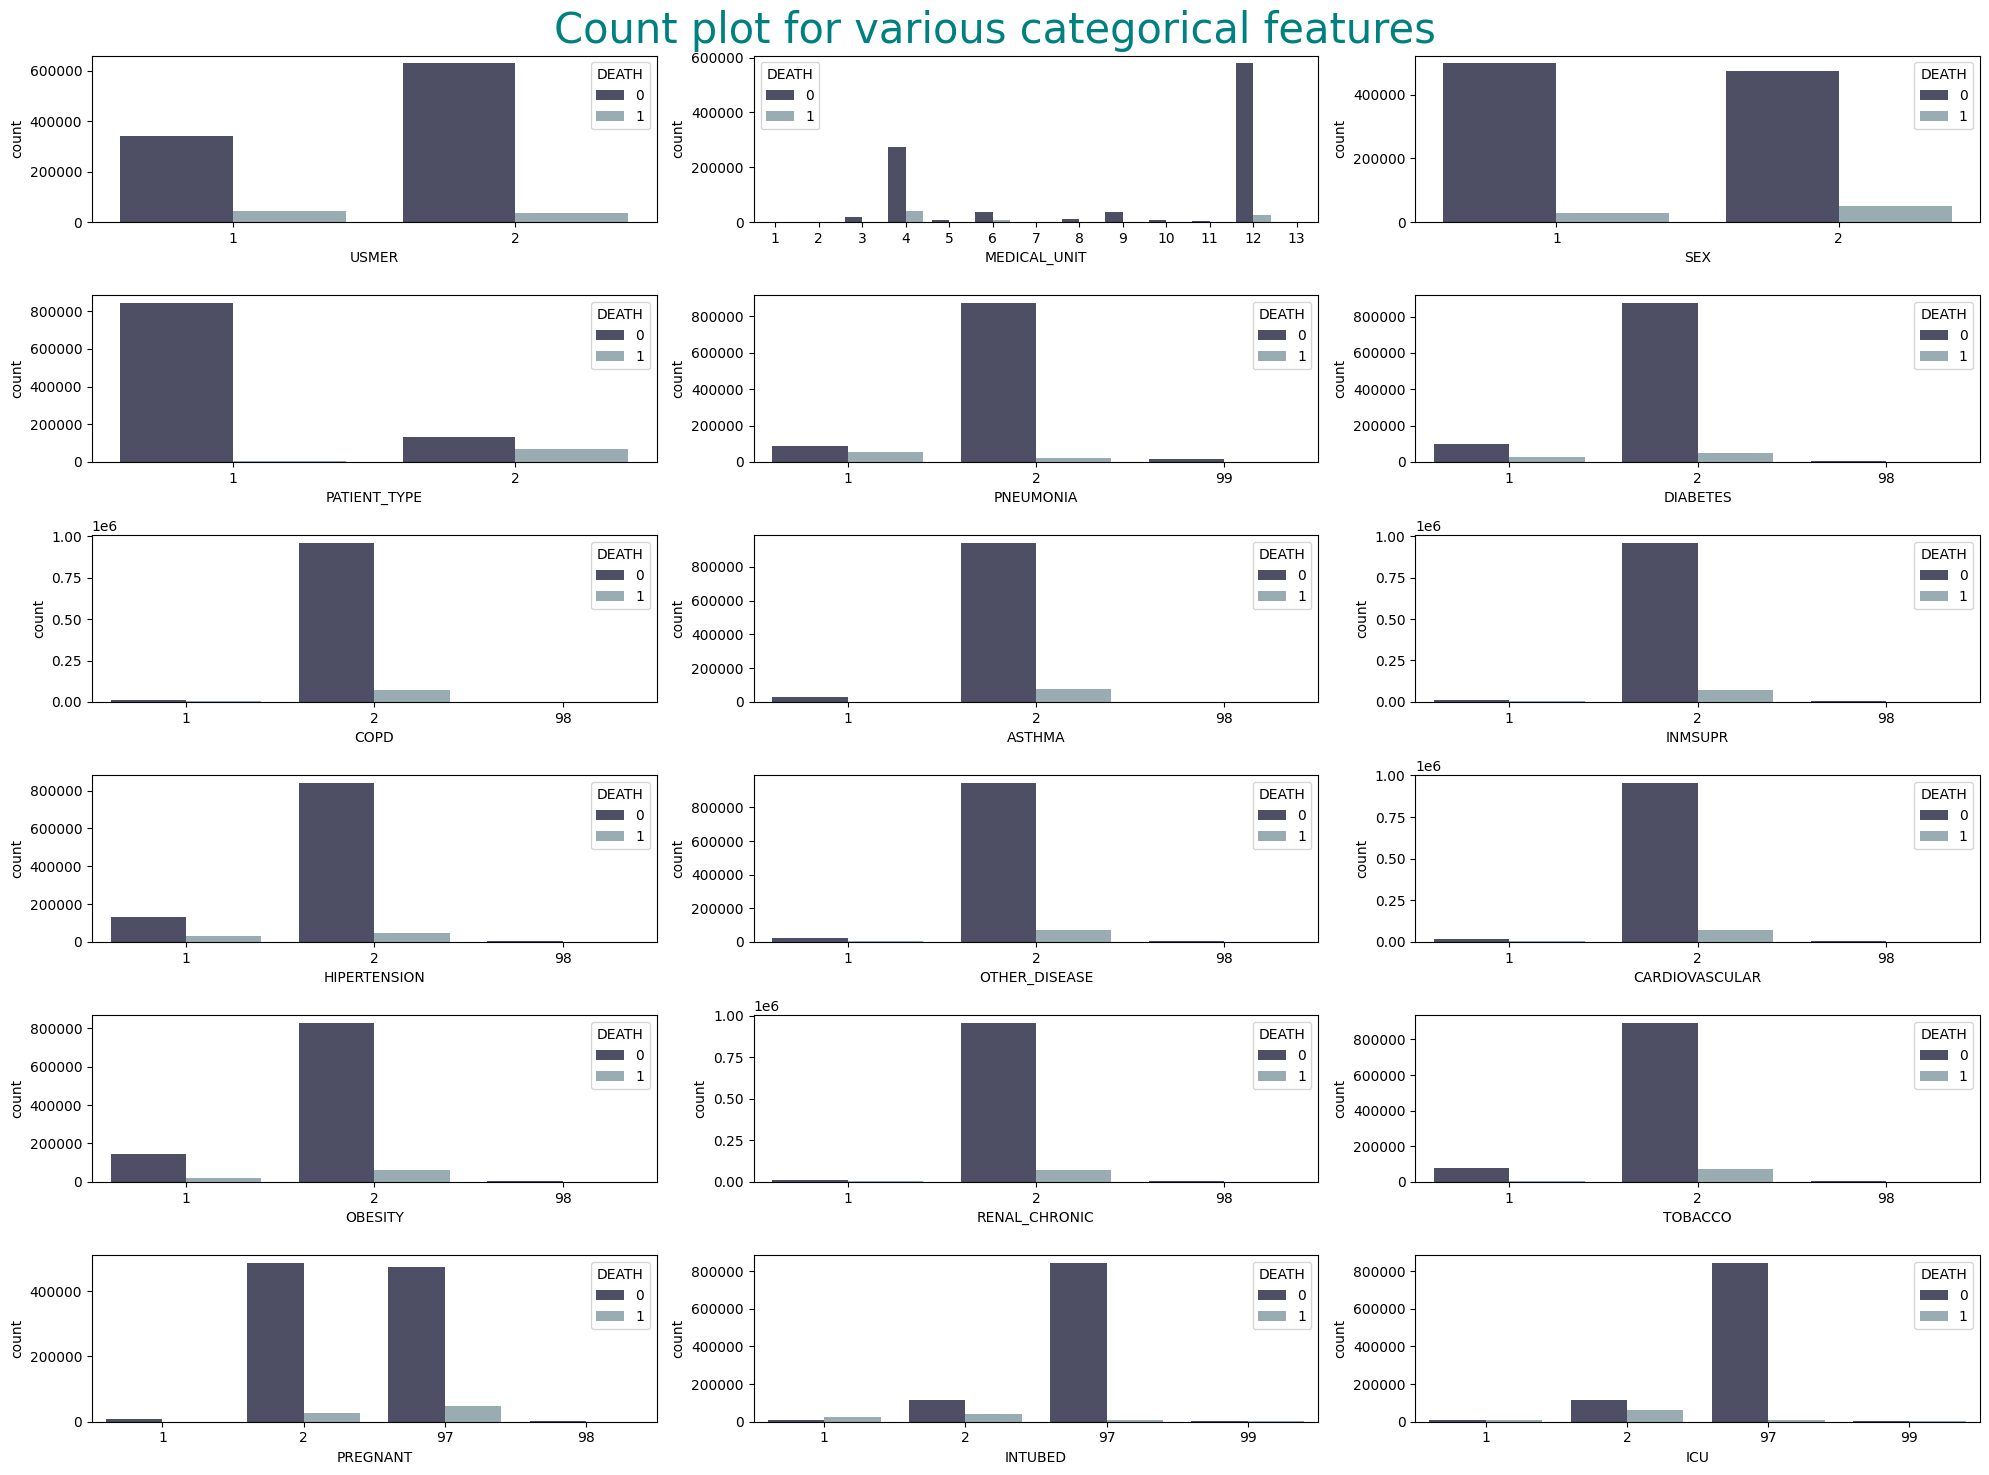

In [115]:
fig, ax = plt.subplots(6, 3, figsize = (20, 15))


plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='USMER', data= df, hue= 'DEATH', ax= ax[0, 0], palette= 'bone')
ax1.set(xlabel = 'USMER')

ax2 = sns.countplot(x ='MEDICAL_UNIT', data= df, hue= 'DEATH', ax= ax[0, 1], palette= 'bone')
ax2.set(xlabel = 'MEDICAL_UNIT')

ax3 = sns.countplot(x ='SEX', data= df, hue= 'DEATH', ax= ax[0, 2], palette= 'bone')
ax3.set(xlabel = 'SEX')

ax4 = sns.countplot(x ='PATIENT_TYPE', data= df, hue= 'DEATH', ax= ax[1, 0], palette= 'bone')
ax4.set(xlabel = 'PATIENT_TYPE')

ax5 = sns.countplot(x ='PNEUMONIA', data= df, hue= 'DEATH', ax= ax[1, 1], palette= 'bone')
ax5.set(xlabel = 'PNEUMONIA')

ax6 = sns.countplot(x ='DIABETES', data= df, hue= 'DEATH', ax= ax[1, 2], palette= 'bone')
ax6.set(xlabel = 'DIABETES')

ax7 = sns.countplot(x ='COPD', data= df, hue= 'DEATH', ax= ax[2, 0], palette= 'bone')
ax7.set(xlabel = 'COPD')

ax8 = sns.countplot(x ='ASTHMA', data= df, hue= 'DEATH', ax= ax[2, 1], palette= 'bone')
ax8.set(xlabel = 'ASTHMA')

ax9 = sns.countplot(x ='INMSUPR', data= df, hue= 'DEATH', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'INMSUPR')

ax9 = sns.countplot(x ='HIPERTENSION', data= df, hue= 'DEATH', ax= ax[3, 0], palette= 'bone')
ax9.set(xlabel = 'HIPERTENSION')

ax10 = sns.countplot(x ='OTHER_DISEASE', data= df, hue= 'DEATH', ax= ax[3, 1], palette= 'bone')
ax10.set(xlabel = 'OTHER_DISEASE')

ax11 = sns.countplot(x ='CARDIOVASCULAR', data= df, hue= 'DEATH', ax= ax[3, 2], palette= 'bone')
ax11.set(xlabel = 'CARDIOVASCULAR')

ax12 = sns.countplot(x ='OBESITY', data= df, hue= 'DEATH', ax= ax[4, 0], palette= 'bone')
ax12.set(xlabel = 'OBESITY')

ax13 = sns.countplot(x ='RENAL_CHRONIC', data= df, hue= 'DEATH', ax= ax[4, 1], palette= 'bone')
ax13.set(xlabel = 'RENAL_CHRONIC')

ax14 = sns.countplot(x ='TOBACCO', data= df, hue= 'DEATH', ax= ax[4, 2], palette= 'bone')
ax14.set(xlabel = 'TOBACCO')

ax14 = sns.countplot(x ='PREGNANT', data= df, hue= 'DEATH', ax= ax[5, 0], palette= 'bone')
ax14.set(xlabel = 'PREGNANT')

ax14 = sns.countplot(x ='INTUBED', data= df, hue= 'DEATH', ax= ax[5, 1], palette= 'bone')
ax14.set(xlabel = 'INTUBED')

ax14 = sns.countplot(x ='ICU', data= df, hue= 'DEATH', ax= ax[5, 2], palette= 'bone')
ax14.set(xlabel = 'ICU')



plt.tight_layout()
plt.show()

## 5. Train-Test Split

In [116]:
# Stratified Shuffle Split to keep the proportion of classes in Train and Test set
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)



for train_index, valid_index in split.split(df, df['DEATH']):

    X_train_base = df.iloc[train_index]

    X_test_base = df.iloc[valid_index]

y_train = X_train_base["DEATH"]
X_train_base = X_train_base.drop("DEATH", axis=1)
X_train_base.drop(["DATE_DIED"], axis=1, inplace=True)

y_test = X_test_base["DEATH"]
X_test_base = X_test_base.drop("DEATH", axis=1)
X_test_base.drop(["DATE_DIED"], axis=1, inplace=True)

In [117]:
X_train_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838860 entries, 623500 to 758796
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   USMER                 838860 non-null  int64
 1   MEDICAL_UNIT          838860 non-null  int64
 2   SEX                   838860 non-null  int64
 3   PATIENT_TYPE          838860 non-null  int64
 4   INTUBED               838860 non-null  int64
 5   PNEUMONIA             838860 non-null  int64
 6   AGE                   838860 non-null  int64
 7   PREGNANT              838860 non-null  int64
 8   DIABETES              838860 non-null  int64
 9   COPD                  838860 non-null  int64
 10  ASTHMA                838860 non-null  int64
 11  INMSUPR               838860 non-null  int64
 12  HIPERTENSION          838860 non-null  int64
 13  OTHER_DISEASE         838860 non-null  int64
 14  CARDIOVASCULAR        838860 non-null  int64
 15  OBESITY               838860 non-n

## 6. Feature Engineering and Selection with Pipeline

In [118]:
all_features = list(X_train_base.columns)
print(all_features)
sel_features = [element for element in all_features if element not in ["INTUBED", "PREGNANT", "ICU", "DATE_DIED"]]
print(sel_features)
cat_features = ["MEDICAL_UNIT"]
num_features = ["AGE"]
ord_features = list(set(sel_features) - set(cat_features) - set(num_features))

['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']
['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']


In [135]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


class preprocessing(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X=X.replace([97,98, 99],np.NaN)
        X=X.drop(columns=["INTUBED", "PREGNANT", "ICU"])
        X=pd.DataFrame(X)
        X.columns = sel_features
        return X

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

pre_pipeline = Pipeline([
    ("pre", preprocessing()),
])

num_pipeline = Pipeline([
    ("mediumImp", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("modeImp", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder())
])

ord_pipeline = Pipeline([
    ("modeImp", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OrdinalEncoder())
])

from sklearn.compose import ColumnTransformer

transformer_pipeline = ColumnTransformer([
#        ("pre", pre_pipeline, all_features),
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features),
        ("ord", ord_pipeline, ord_features)
    ])

In [137]:
prepare_pipeline = Pipeline([
    ('preparation', pre_pipeline),   
    ('feature_encoding', transformer_pipeline),
])

In [138]:
# Use Pipeline to process the training data
X_train_prep = prepare_pipeline.fit_transform(X_train_base)

In [142]:
X_train_base.shape

(838860, 20)

## 7. Quick Assessment of multiple models

In [54]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

random_state = 2
classifiers = []
#classifiers.append(SVC(random_state=random_state,))
classifiers.append(DecisionTreeClassifier(random_state=random_state,))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state,),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state,))
classifiers.append(ExtraTreesClassifier(random_state=random_state,))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(xgboost.XGBClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

In [56]:
kfold=StratifiedKFold(n_splits=2,shuffle=True)
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train_prep, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))
    print(classifier)

DecisionTreeClassifier(random_state=2)
AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=2),
                   learning_rate=0.1, random_state=2)
RandomForestClassifier(random_state=2)
ExtraTreesClassifier(random_state=2)
GradientBoostingClassifier(random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_paral

   CrossValMeans  CrossValerrors           Algorithm
0       0.799934        0.000630        DecisionTree
1       0.846421        0.000529            AdaBoost
2       0.931835        0.000654        RandomForest
3       0.878634        0.000370          ExtraTrees
4       0.959146        0.000231    GradientBoosting
5       0.959940        0.000110             Xgboost
6       0.896698        0.000447         KNeighboors
7       0.954915        0.000334  LogisticRegression


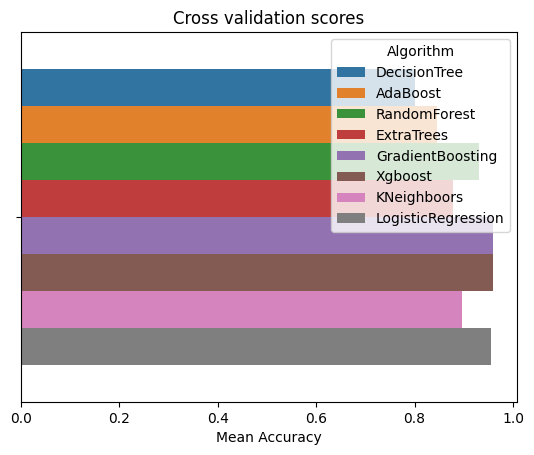

In [68]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Xgboost","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot(
    x=cv_res["CrossValMeans"],
    hue=cv_res["Algorithm"],
    legend=True,
    orient="h",
)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## 8. Class Weights/Over Sampling

In [102]:
X_train_base.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
623500,2,12,1,1,9999-99-99,97,2,63,2,2,...,2,2,2,2,2,2,2,2,3,97
162985,2,4,2,1,9999-99-99,97,2,24,97,2,...,2,2,2,2,2,2,2,2,5,97
670340,2,12,1,1,9999-99-99,97,2,38,2,2,...,2,2,2,2,2,2,2,2,5,97
159230,2,4,1,1,9999-99-99,97,2,31,2,2,...,2,2,2,2,2,1,2,2,5,97
715813,1,12,2,1,9999-99-99,97,2,57,97,2,...,2,2,2,2,2,2,2,2,6,97


In [152]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
#oversampling the minority classes with synthetic cases
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train_prep, y_train)

In [124]:
y_train_oversampled.value_counts()

DEATH
0    777306
1    777306
Name: count, dtype: int64

In [125]:
kfold=StratifiedKFold(n_splits=2,shuffle=True)
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_oversampled, y = y_train_oversampled, scoring = "roc_auc", cv =kfold , n_jobs=-1))
    print(classifier)

DecisionTreeClassifier(random_state=2)
AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=2),
                   learning_rate=0.1, random_state=2)
RandomForestClassifier(random_state=2)
ExtraTreesClassifier(random_state=2)
GradientBoostingClassifier(random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_paral

   CrossValMeans  CrossValerrors           Algorithm
0       0.965434        0.000001        DecisionTree
1       0.973692        0.000002            AdaBoost
2       0.983056        0.000016        RandomForest
3       0.981259        0.000096          ExtraTrees
4       0.972457        0.000023    GradientBoosting
5       0.975803        0.000033             Xgboost
6            NaN             NaN         KNeighboors
7       0.948344        0.000006  LogisticRegression


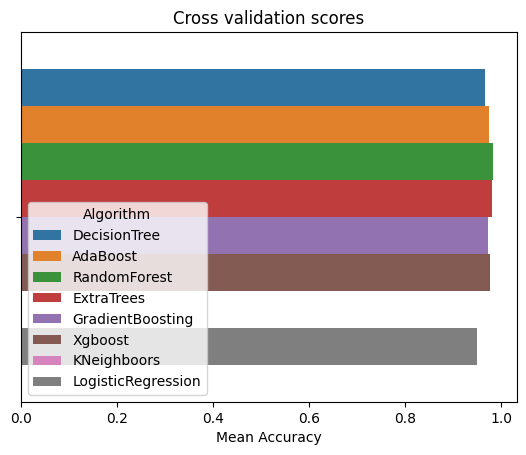

In [126]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame(
    {
        "CrossValMeans": cv_means,
        "CrossValerrors": cv_std,
        "Algorithm": [
            "DecisionTree",
            "AdaBoost",
            "RandomForest",
            "ExtraTrees",
            "GradientBoosting",
            "Xgboost",
            "KNeighboors",
            "LogisticRegression",
        ],
    }
)
print(cv_res)

g = sns.barplot(
    x=cv_res["CrossValMeans"],
    hue=cv_res["Algorithm"],
    legend=True,
    orient="h",
)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [127]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)
class_weights

array([0.53959445, 6.81401696])

In [128]:
kfold=StratifiedKFold(n_splits=2,shuffle=True)
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_prep, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))
    print(classifier)

DecisionTreeClassifier(random_state=2)
AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=2),
                   learning_rate=0.1, random_state=2)
RandomForestClassifier(random_state=2)
ExtraTreesClassifier(random_state=2)
GradientBoostingClassifier(random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_paral

   CrossValMeans  CrossValerrors           Algorithm
0       0.800648        0.001118        DecisionTree
1       0.845906        0.002132            AdaBoost
2       0.932383        0.000403        RandomForest
3       0.879795        0.000851          ExtraTrees
4       0.959176        0.000222    GradientBoosting
5       0.959886        0.000006             Xgboost
6       0.895635        0.001321         KNeighboors
7       0.954917        0.000250  LogisticRegression


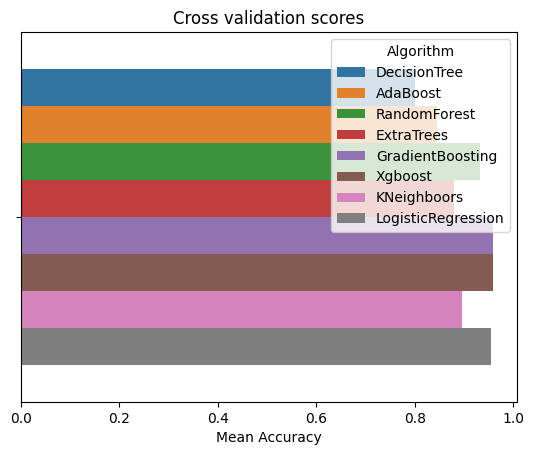

In [129]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame(
    {
        "CrossValMeans": cv_means,
        "CrossValerrors": cv_std,
        "Algorithm": [
            "DecisionTree",
            "AdaBoost",
            "RandomForest",
            "ExtraTrees",
            "GradientBoosting",
            "Xgboost",
            "KNeighboors",
            "LogisticRegression",
        ],
    }
)
print(cv_res)

g = sns.barplot(
    x=cv_res["CrossValMeans"],
    hue=cv_res["Algorithm"],
    legend=True,
    orient="h",
)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## 9. Hyperparameter Search for best model

In [154]:
from sklearn.model_selection import RandomizedSearchCV
RFC = RandomForestClassifier()
RF_param_grid = {
                 
              'n_estimators' : [100,200],
              'max_depth': [4],
              'min_samples_leaf': [100,150],
              
              }
RF_cls = RandomizedSearchCV(
    estimator=RFC,
    param_distributions=RF_param_grid,
    random_state=3,
    scoring="roc_auc",
    cv=kfold,
    n_jobs=1,
)


RF_cls.fit(X_train_oversampled, y=y_train_oversampled)

c:\Users\je009447\AppData\Local\miniconda3\envs\django_outlierdetection\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [4],
                                        'min_samples_leaf': [100, 150],
                                        'n_estimators': [100, 200]},
                   random_state=3, scoring='roc_auc')

## 10. Final Model Evaluation

In [155]:
X_test_prep = prepare_pipeline.transform(X_test_base)
y_predict = RF_cls.predict(X_test_prep)

In [156]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

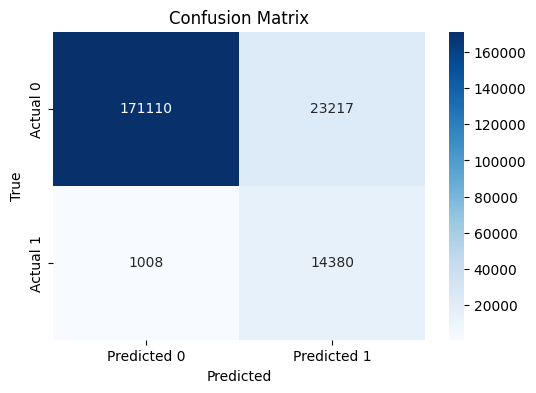

Accuracy: 0.884
F1 Score: 0.543
Precision: 0.382
Recall: 0.934


In [157]:
cm = confusion_matrix(y_test, y_predict)


plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)


print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")